# Business Problem
As a Data Mining/Analytic Consultant, you are asked develop a **Customer Segmentation** in such a way that it will be possible for the Marketing Department to **better understand all the different Customers’ Profiles**.
You are expected to **define, describe and explain the clusters you chose**. Invest time in reasoning how you want to do your clustering, possible approaches, and advantages or disadvantages of different decisions.
Simultaneous, you should **express the marketing approach you recommend for each cluster**. 
A credit card company makes money, mainly, if/via:
* Customers don't pay their balance in full every month to avoid interest charges;
* Transaction fees (e.g., cash advance fees);
* Interchange - Every time you use a credit card, the merchant pays a processing fee equal to a percentage of the transaction. The portion of that fee sent to the issuer via the payment network is called “interchange,” and is usually about 1% to 3% of the transaction. These fees are set by payment networks and vary based on the volume and value of transactions.

# Business Understanding

"This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :

**CUSTID** : Identification of Credit Card holder

**BALANCE** : Amount left to make purchases.

**BALANCEFREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

**PURCHASES** : Amount of purchases made from account

**ONEOFFPURCHASES** : Maximum purchase amount done in one-go

**INSTALLMENTSPURCHASES** : Amount of purchase done in installment

**CASHADVANCE** : Cash in advance given by the user. A cash advance on your credit card is an amount of cash borrowed against your credit limit. It's like withdrawing money from the ATM with your debit card, except the cash comes from your credit limit rather than your bank account balance. That means you have to pay it back with interest.

**PURCHASESFREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not 
frequently purchased)

**ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

**PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

**CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid

**CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"

**PURCHASESTRX** : Number of purchase transactions made

**CREDITLIMIT** : Maximum amount of credit a financial institution extends to a client

**PAYMENTS** : Amount of Payment done by user

**MINIMUM_PAYMENTS** : Minimum amount of payments made by user. It's the minimum amount of money you need to pay towards your credit card balance each month to avoid a late charge or fee. After 30 days without paying at least the minimum, your account can be reported delinquent and your credit score could also take a hit.

**PRCFULLPAYMENT** : Percent of full payment paid by user?

**TENURE** : Months to pay the debt"

Dataset retirado do Kaggle: https://www.kaggle.com/arjunbhasin2013/ccdata

**Insights**
* Apesar de existirem várias variáveis baseadas na Frequência, não sabemos definir ao certo o que torna alguém Frequente e alguém não-frequente. Precisaríamos de pedir informação sobre o que define alguém considerado frequente de alguém não-frequente.
* Remover as variáveis de frequência é possível? A verdade é que 1 e 0 não diz muito a um modelo.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import shutil
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import os
import requests
import sklearn as sc
from zipfile import ZipFile
import category_encoders as ce
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import collections
from scipy import stats
import matplotlib.ticker as mtick
import category_encoders as ce
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import collections
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('CC GENERAL.csv', encoding='utf-8')

#(file, delimiter = ";")

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Analisar primeiras 5 linhas
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
# Passar a coluna CUST_ID para o índex da tabela
df.set_index("CUST_ID", inplace = True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Data Understanding

In [6]:
# Análise da tabela
n_rows, n_columns = df.shape
print("O dataset tem {} Linhas e {} Colunas.".format(n_rows, n_columns))

O dataset tem 8950 Linhas e 17 Colunas.


In [7]:
# Descrição dos dados
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

**Insights**
* Não há variáveis categóricas.

In [8]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Insights**
* Apenas **_Balance Frequency_ , _Purchases_Frequency_ , _PRC_Full_Payment_ e _Tenure_** têm um valor na média e mediana semelhantes. Será preciso fazer alguma transformação para ter uma distribuição mais normal.
* As variáveis de frequêcia já devem estar normalizadas.
* Standard deviation grande em várias variáveis.
* Poucas variáveis com missing values.
* As variáveis relacionadas com **_PURCHASES_** têm um máximo superior ao **_BALANCE_**. Tem sentido? O que significa?

In [9]:
# Análise de todos os valores únicos na base de dados para tentar encontrar valores estranhos
for col in df:
    print(df[col].unique())

[  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]
[0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667]
[  95.4     0.    773.17 ...  291.12  144.4  1093.25]
[   0.    773.17 1499.   ...  734.4  1012.73 1093.25]
[  95.4     0.   1333.28 ...  113.28  291.12  144.4 ]
[   0.       6442.945483  205.788017 ... 8555.409326   36.558778
  127.040008]
[0.166667 0.       1.       0.083333 0.666667 0.333333 0.25     0.75
 0.5      0.416667 0.916667 0.583333 0.375    0.625    0.272727 0.833333
 0.909091 0.111111 0.142857 0.090909 0.363636 0.1      0.875    0.125
 0.818182 0.636364 0.2      0.8      0.3      0.9      0.285714 0.727273
 0.181818 

**Insights**
* Não há valores estranhos. Apenas missing values.

In [10]:
# Número de Missing Values por Variável
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
# Percentagem dos missing values por variável
df.isna().sum()/df.shape[0]*100

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

**Insights**
* Poucas variáveis com missing values. As que têm, têm poucos valores em falta.

### Análise Visual

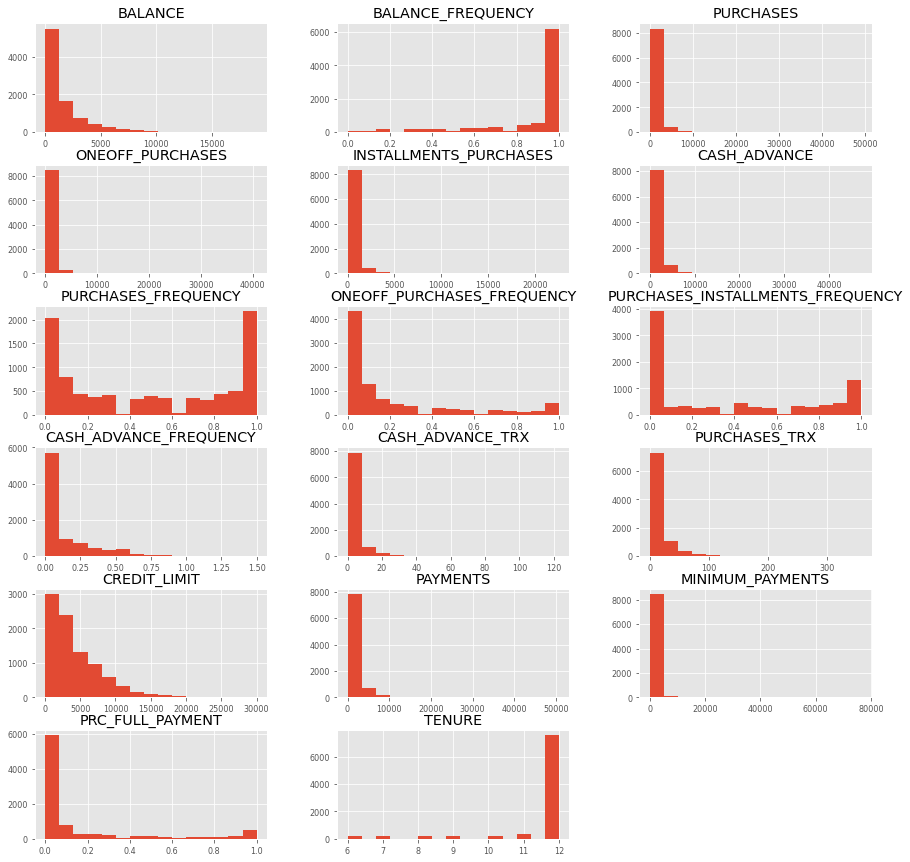

In [12]:
# Do histograms on all numeric variables
numerical=df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical].hist(bins=15, figsize=(15, 15), layout=(6, 3), xlabelsize=8, ylabelsize=8);

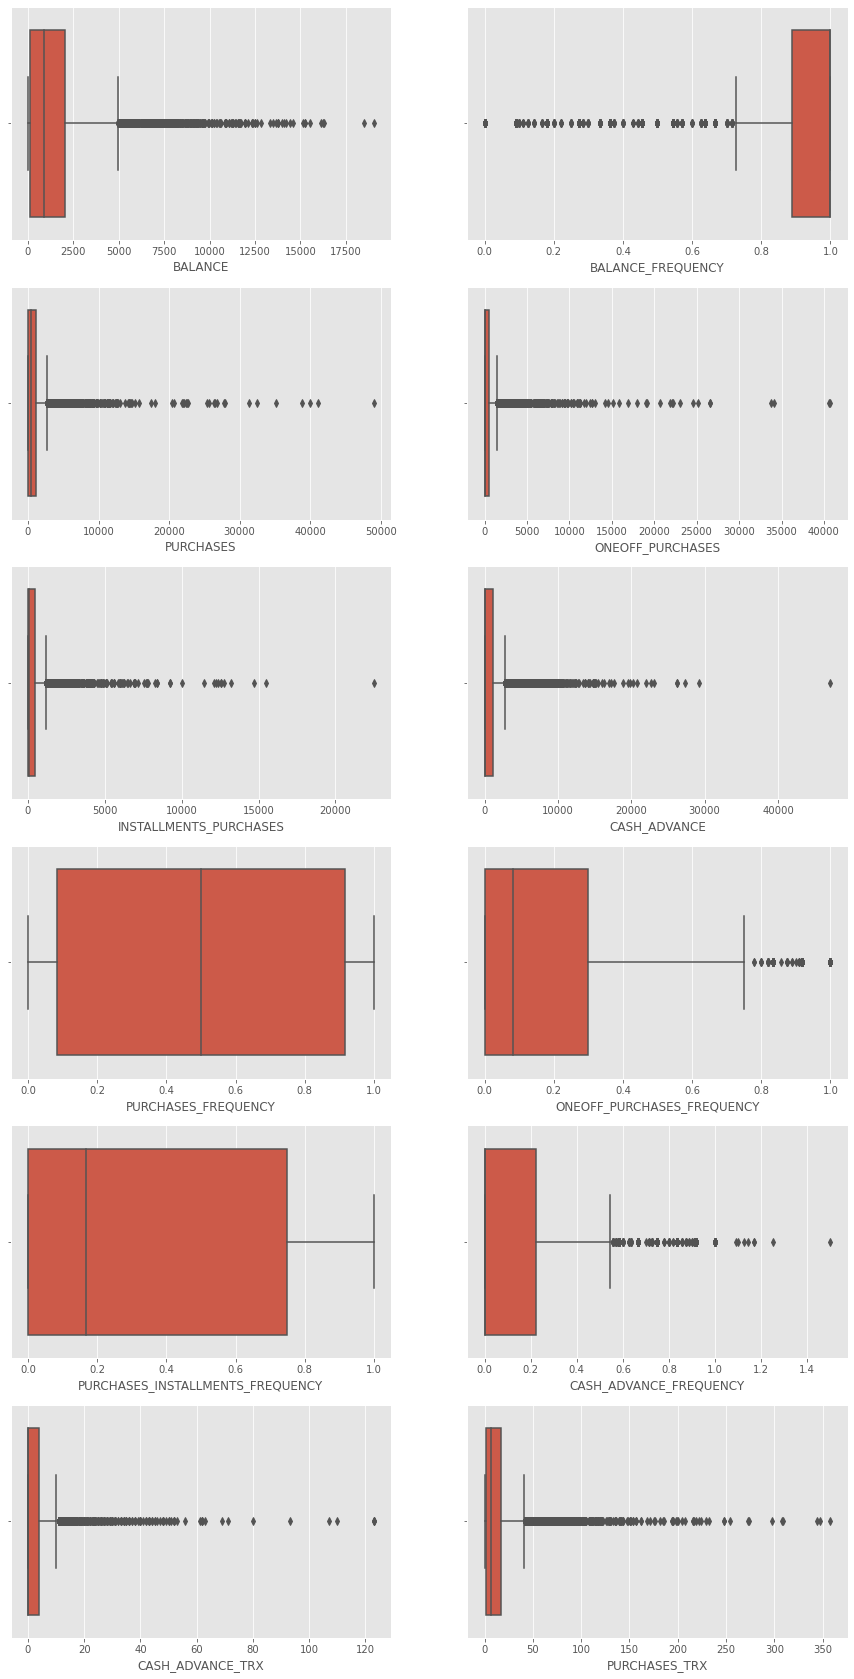

In [13]:
# Do boxplots on all numeric variables
fig, ax = plt.subplots(6, 2, figsize=(15, 30))
for var, subplot in zip(df[numerical], ax.flatten()):
    sns.boxplot(df[var], ax=subplot)

**Insights**
* Apenas 2 variáveis não têm o que podem, à partida, ser considerados outliers.
* Quase não há distribuições normais.
* O que significam os valores de _Tenure_

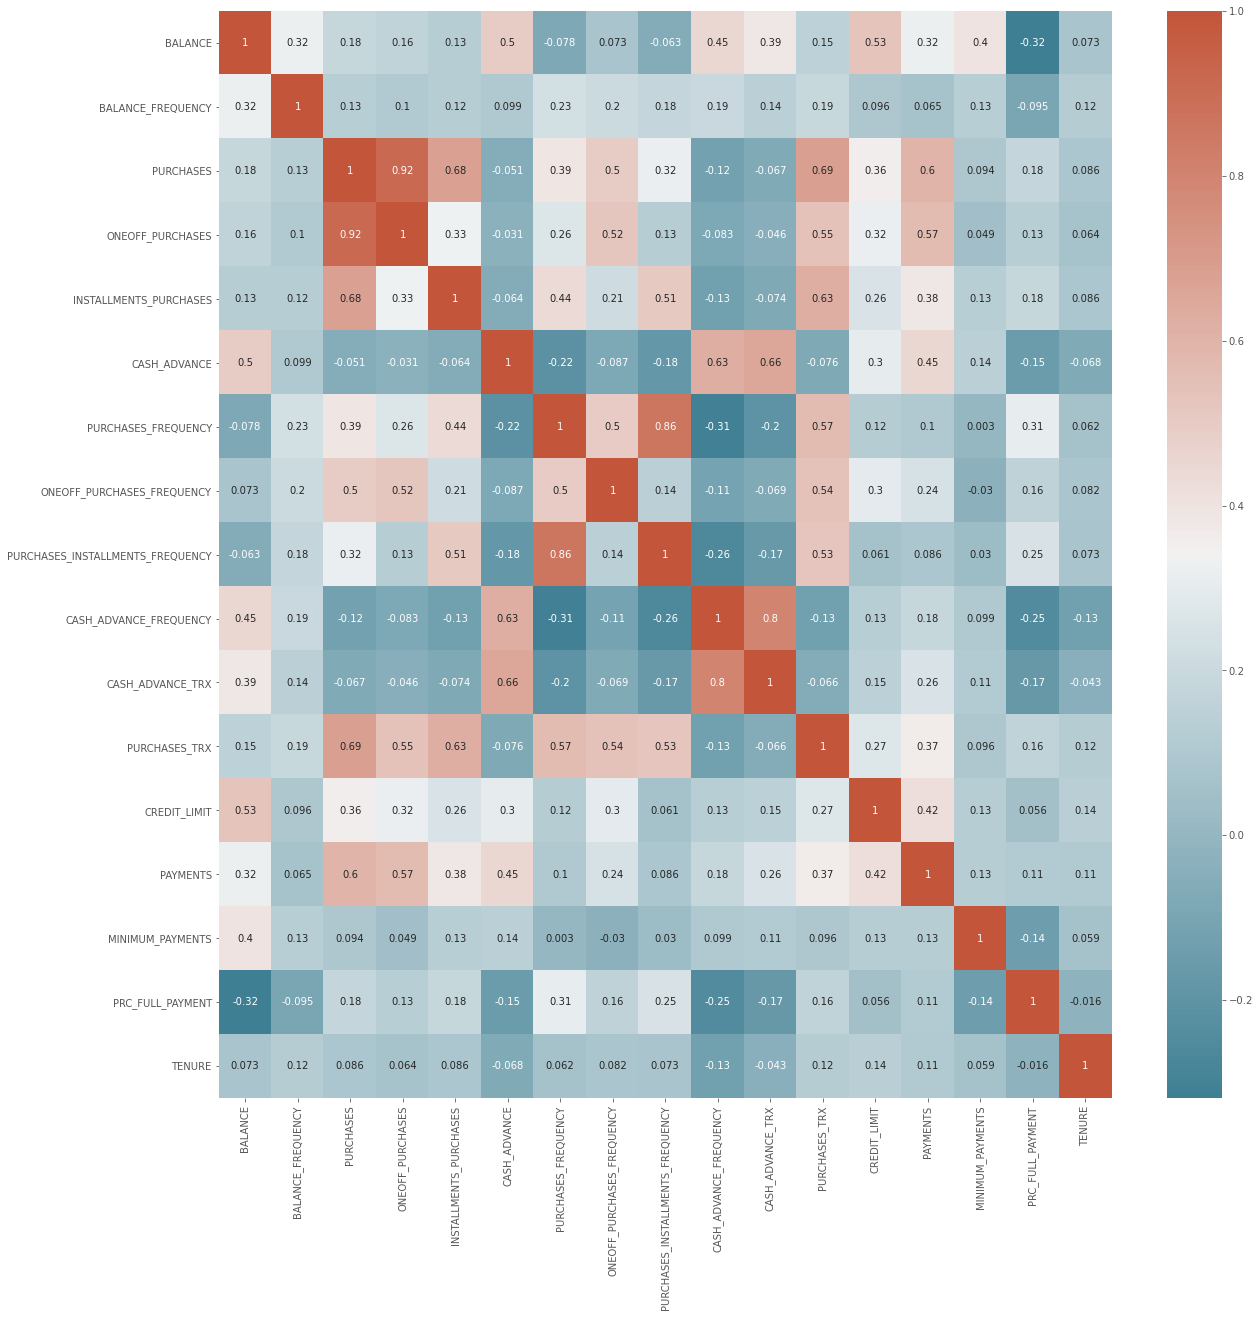

In [14]:
# Análise da correlação entre variáveis

cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, cmap = cmap)
plt.show()

**Insights**
* Alta correlação entre _Purchases_ e _Oneoff_Purchases_ e entre _Purchases_Frequency_ e _Purchases_Installments_Frequency_. Será preciso remover 2 destas variáveis para evitar multicolinearidade.

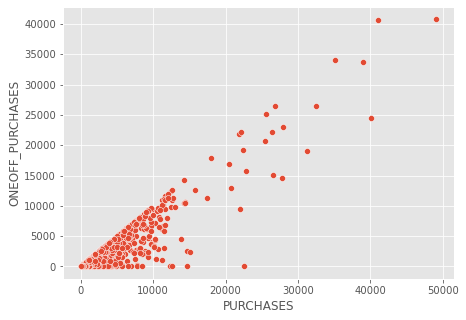

In [15]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = "PURCHASES", y = "ONEOFF_PURCHASES")
plt.show()

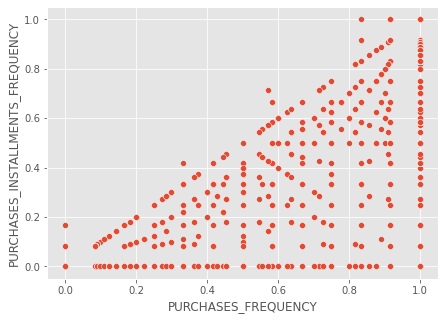

In [16]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = "PURCHASES_FREQUENCY", y = "PURCHASES_INSTALLMENTS_FREQUENCY")
plt.show()

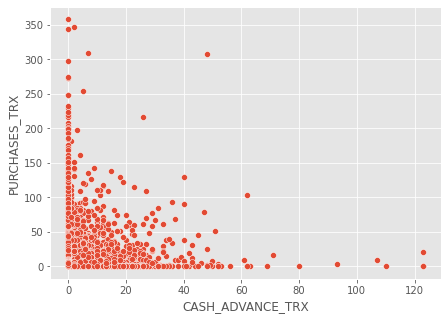

In [17]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = "CASH_ADVANCE_TRX", y = "PURCHASES_TRX")
plt.show()

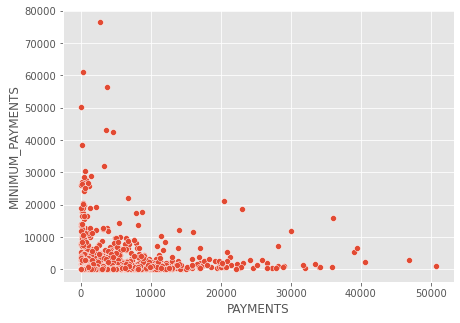

In [18]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = "PAYMENTS", y = "MINIMUM_PAYMENTS")
plt.show()

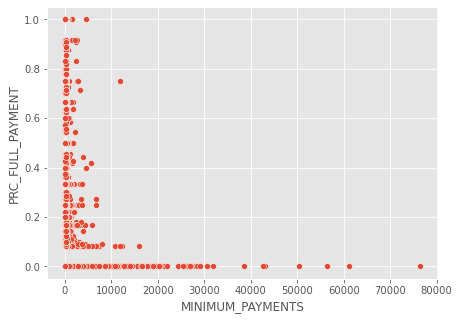

In [19]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = "MINIMUM_PAYMENTS", y = "PRC_FULL_PAYMENT")
plt.show()

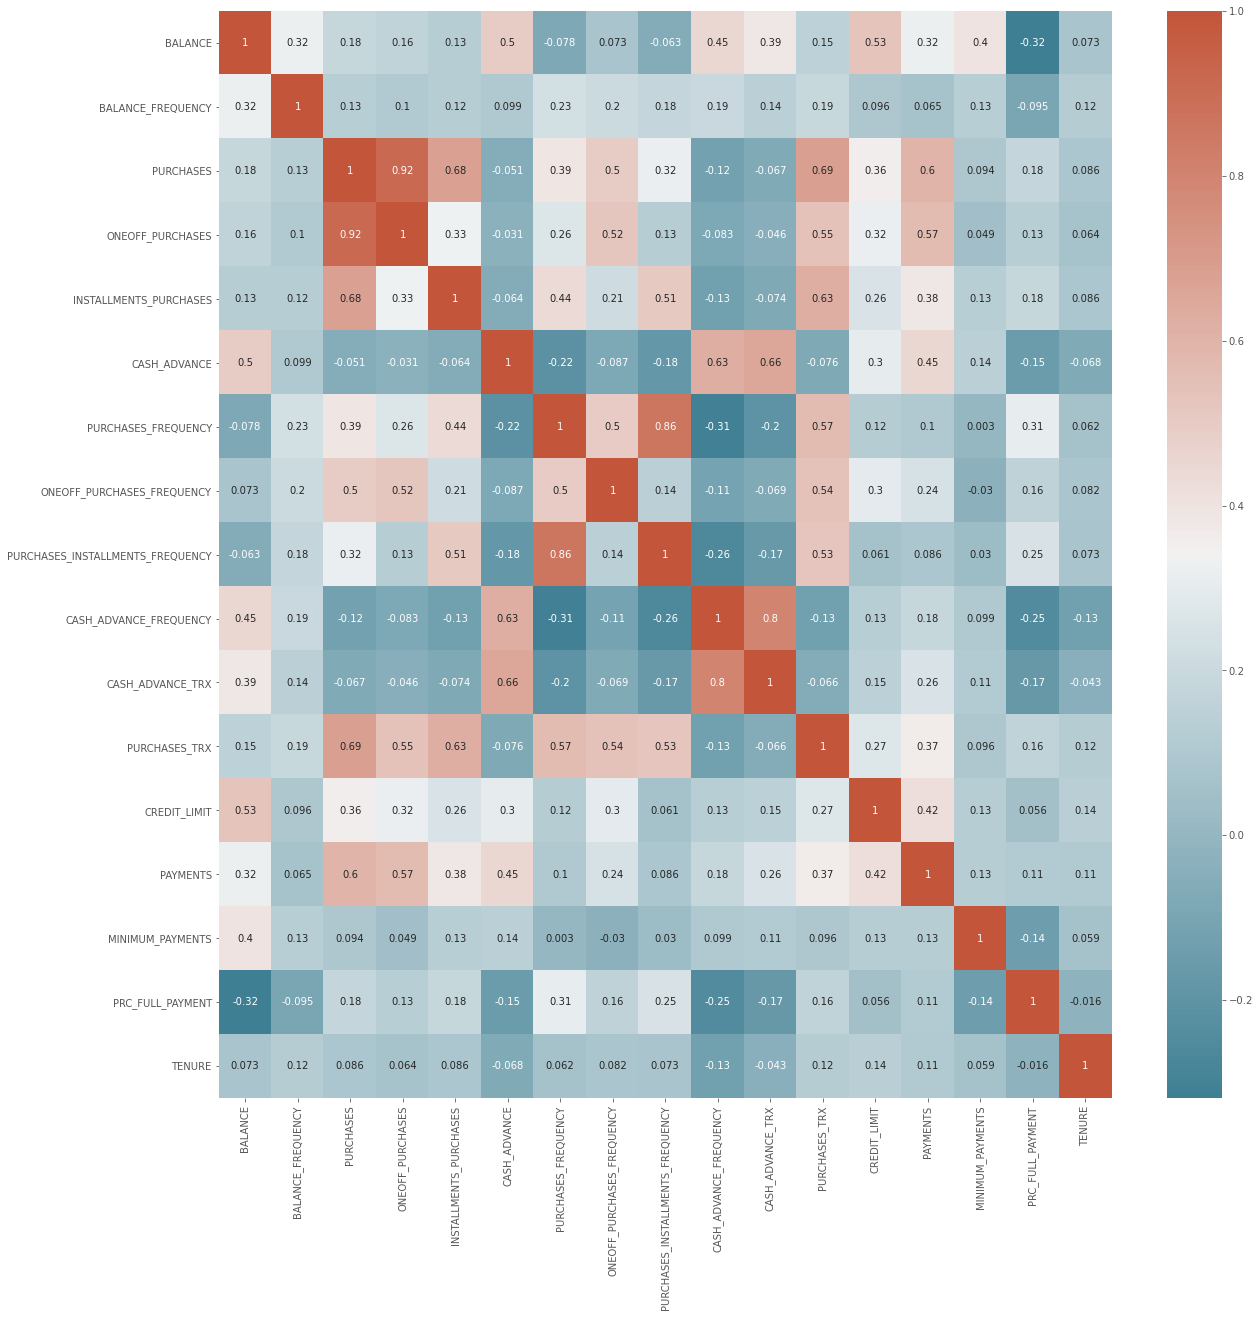

In [20]:
# Análise da correlação entre variáveis

cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, cmap = cmap)
plt.show()

# Data Preparation
* Missing Values
* Feature Engineering
* Outliers
* Drop Correlated Features
* Normalization (PCA & Data Reduction?)

In [21]:
# Cópia do dataframe pré-tratamento
X = df.copy(deep=True)

## Missing Values

**_CREDIT_LIMIT_** tem 0.01% de dados em falta e **_MINIMUM_PAYMENTS_** tem 3,5% de dados em falta. Removem-se os valores em falta.

In [22]:
# Remoção todos os missing values
X.dropna(inplace=True)

In [23]:
# Confirmação de que já não há missing values
X.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [24]:
n_rows, n_columns = X.shape
print("O dataset tem {} Linhas e {} Colunas.".format(n_rows, n_columns))

O dataset tem 8636 Linhas e 17 Colunas.


In [25]:
# Preenchimento dos campos NaN com 0. Estes existem porque um dos valores na equação era 0. O resultado tem sentido.
X.fillna(0, inplace = True)
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


## Feature Engineering
* FEE APPLIED -> Quando a pessoa não paga o minimum payment

In [26]:
X['Fee_Applied'] = X['MINIMUM_PAYMENTS'] - X['PAYMENTS']
X.loc[X['Fee_Applied'] > 0, 'Fee_Applied?'] = 1
X.drop(['Fee_Applied'], axis=1, inplace = True)

* Frequency -> Frequencia Mensal de Transações = PURCHASES_TRX + CASH_ADVANCE_TRX a dividir pelos 6 meses

In [27]:
X['FREQ'] = (X['PURCHASES_TRX'] + X['CASH_ADVANCE_TRX']) / 6

* Monetary -> INSTALLMENTSPURCHASES + CASHADVANCE

In [28]:
X['MON'] = X['INSTALLMENTS_PURCHASES'] + X['CASH_ADVANCE']

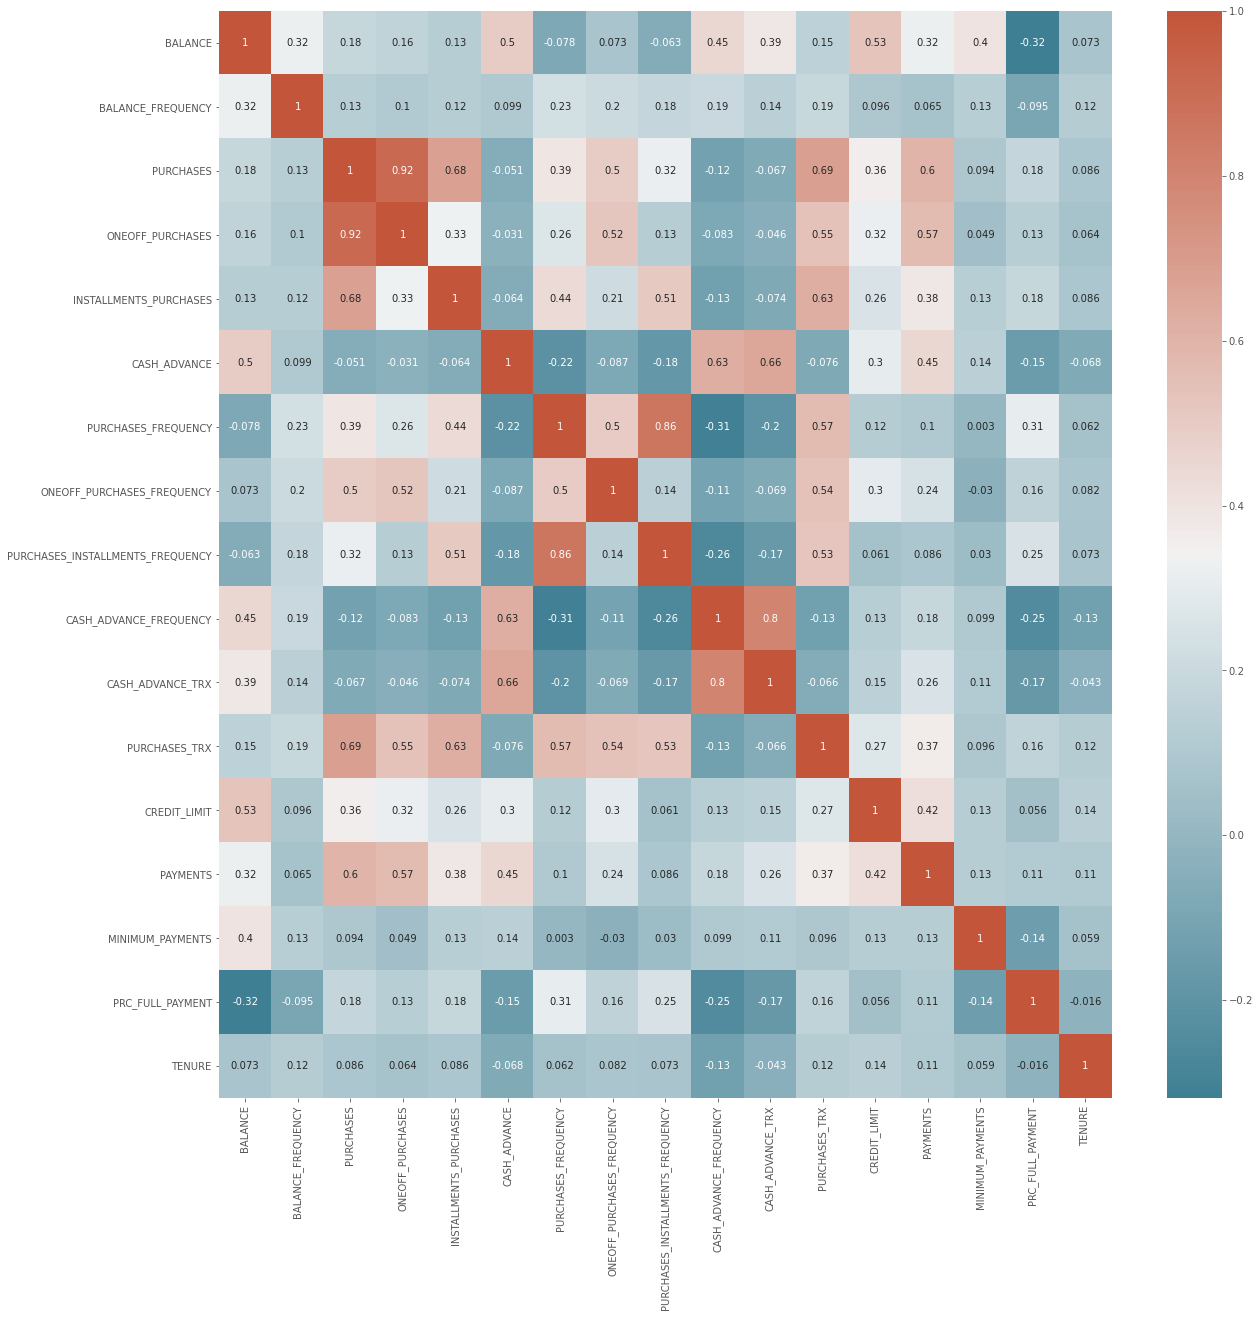

In [29]:
# Análise da correlação entre variáveis

cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, cmap = cmap)
plt.show()

In [30]:
dataCorr = X.corr()
dataCorr = dataCorr.mask(np.tril(np.ones(dataCorr.shape)).astype(np.bool))

correlation_mat = dataCorr

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.75 ]

strong_pairs2 = sorted_pairs[abs(sorted_pairs) < -0.75 ]

print(strong_pairs, strong_pairs2)

CASH_ADVANCE_TRX                  CASH_ADVANCE_FREQUENCY    0.799593
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_FREQUENCY       0.862338
MON                               CASH_ADVANCE              0.913924
ONEOFF_PURCHASES                  PURCHASES                 0.916780
FREQ                              PURCHASES_TRX             0.963163
dtype: float64 Series([], dtype: float64)


## Outliers

* "If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric." - https://community.gooddata.com/metrics-and-maql-kb-articles-43/normality-testing-skewness-and-kurtosis-241


* Muitas variáveis neste dataset têm zeros, pelo que não dará para transformar os dados através de transformações log ou boxcox. Ainda assim, é possível diminuir a skewness dos dados através da Square Root Transformation ou Log1p. Tendo em conta a informação acima, o objetivo passa por ter valores de skewness entre -0.5 e 0.5. Nas que for possível a transformação log ou boxcox fá-las-emos.

Apoio: 
* https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45
* https://machinelearningmastery.com/power-transform-time-series-forecast-data-python/
* https://stackoverflow.com/questions/65982059/is-log1p-the-correct-way-of-doing-log-scale-transformation-of-charts
* https://discuss.analyticsvidhya.com/t/methods-to-deal-with-zero-values-while-performing-log-transformation-of-variable/2431/2

In [31]:
# Summary statistics for all variables
summary=X.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

,count,mean,std,min,25%,50%,75%,max
BALANCE,8636.0,1601.224893,2095.571300,0.000000,148.095189,916.855459,2105.195853,19043.138560
BALANCE_FREQUENCY,8636.0,0.895035,0.207697,0.000000,0.909091,1.000000,1.000000,1.000000
PURCHASES,8636.0,1025.433874,2167.107984,0.000000,43.367500,375.405000,1145.980000,49039.570000
ONEOFF_PURCHASES,8636.0,604.901438,1684.307803,0.000000,0.000000,44.995000,599.100000,40761.250000
INSTALLMENTS_PURCHASES,8636.0,420.843533,917.245182,0.000000,0.000000,94.785000,484.147500,22500.000000
CASH_ADVANCE,8636.0,994.175523,2121.458303,0.000000,0.000000,0.000000,1132.385490,47137.211760
PURCHASES_FREQUENCY,8636.0,0.496000,0.401273,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8636.0,0.205909,0.300054,0.000000,0.000000,0.083333,0.333333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8636.0,0.368820,0.398093,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8636.0,0.137604,0.201791,0.000000,0.000000,0.000000,0.250000,1.500000


In [32]:
#Safe

XPrelog = X.copy()

· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed

· If the skewness is less than -1 or greater than 1, the data are highly skewed

In [33]:
left_skew = []
right_skew = []
normal_dist = []

for i in X.columns:
    if X[i].skew() > 0.5:
        right_skew.append(i)
        print(i,X[i].skew())
    if X[i].skew() < -0.5:
        left_skew.append(i)
        print(i,X[i].skew())
    if X[i].skew() >= -0.5 and X[i].skew() <= 0.5:
        normal_dist.append(i)
        print(i,X[i].skew())

BALANCE 2.374254166807352
BALANCE_FREQUENCY -2.0841614822186645
PURCHASES 8.055789007455493
ONEOFF_PURCHASES 9.935775932966443
INSTALLMENTS_PURCHASES 7.216133308729194
CASH_ADVANCE 5.13962856566708
PURCHASES_FREQUENCY 0.03304121629361682
ONEOFF_PURCHASES_FREQUENCY 1.5042342334651355
PURCHASES_INSTALLMENTS_FREQUENCY 0.48775295432449595
CASH_ADVANCE_FREQUENCY 1.7959150389505736
CASH_ADVANCE_TRX 5.673326830236882
PURCHASES_TRX 4.578418450576066
CREDIT_LIMIT 1.5070190408804254
PAYMENTS 5.873048586774976
MINIMUM_PAYMENTS 13.622193089492018
PRC_FULL_PAYMENT 1.8860271302192868
TENURE -3.011140522570408
Fee_Applied? 0
FREQ 4.448699372323779
MON 4.732966836229114


In [34]:
normal_dist

['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'Fee_Applied?']

In [35]:
left_skew

['BALANCE_FREQUENCY', 'TENURE']

In [36]:
right_skew

['BALANCE',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'ONEOFF_PURCHASES_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'FREQ',
 'MON']

#### Copia DF pré transformação

In [37]:
Z = X.copy()

In [38]:
Y = X.copy()

###### Ver o que funciona melhor para right skewed

In [39]:
#LOG 10

#como tem valores zero apliquei +1

Z[right_skew]=np.log10(Z[right_skew]+1)

In [40]:
#Square Root

Y[right_skew] = np.sqrt(Y[right_skew])

Skewness original:  2.393386042571806 Skewness Log10:  -0.7760035358816254 Skewness SR:  0.8270918500672242
Skewness original:  -2.0232655185149078 Skewness Log10:  -2.0841614822186645 Skewness SR:  -2.0841614822186645
Skewness original:  8.144269064554651 Skewness Log10:  -0.7776879605982571 Skewness SR:  1.7146160789808769
Skewness original:  10.045082884700278 Skewness Log10:  0.16841964410507437 Skewness SR:  2.1170132956535115
Skewness original:  7.299119908745641 Skewness Log10:  -0.04215742921362819 Skewness SR:  1.5267212999177167
Skewness original:  5.1666090740747235 Skewness Log10:  0.24816946406309018 Skewness SR:  1.4778900822967251
Skewness original:  0.0601642358580359 Skewness Log10:  0.03304121629361682 Skewness SR:  0.03304121629361682
Skewness original:  1.5356127835248519 Skewness Log10:  1.2607222558717441 Skewness SR:  0.701727249682715
Skewness original:  0.5092011649999882 Skewness Log10:  0.48775295432449595 Skewness SR:  0.48775295432449595
Skewness original: 

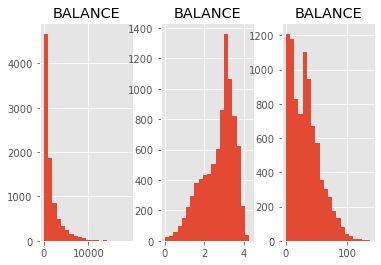

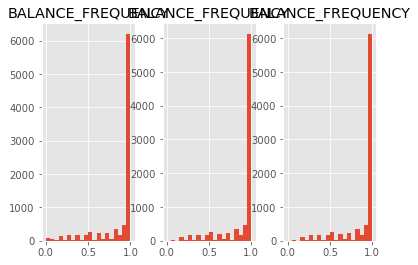

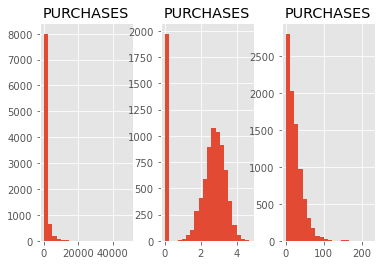

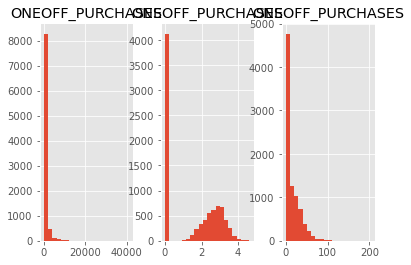

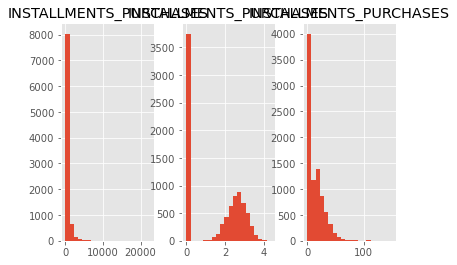

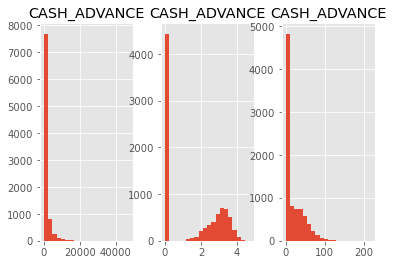

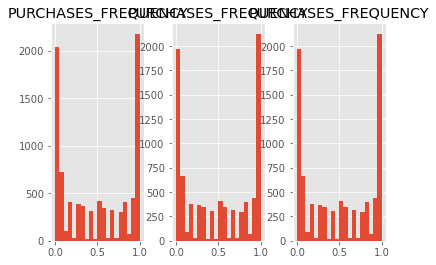

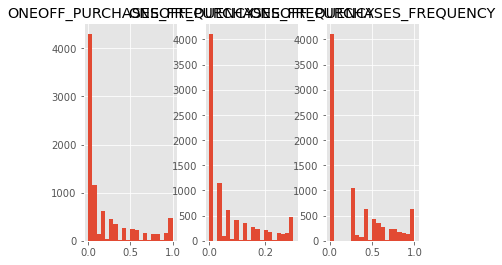

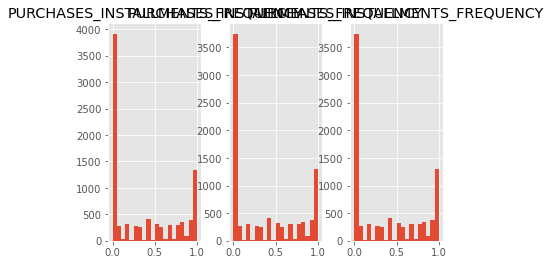

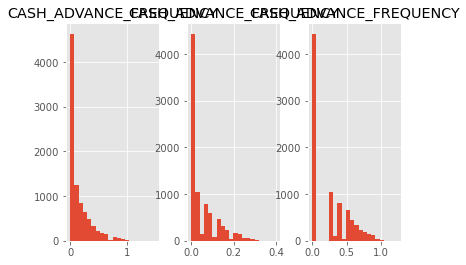

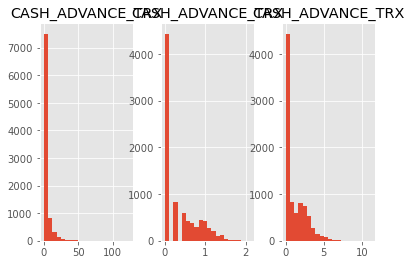

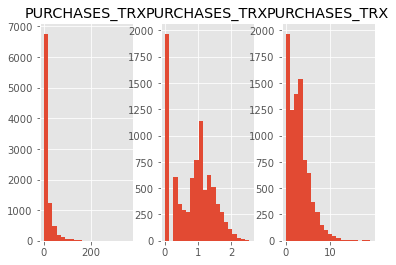

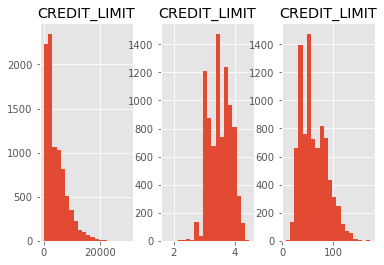

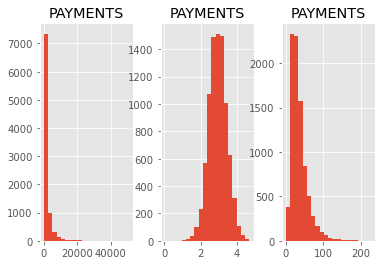

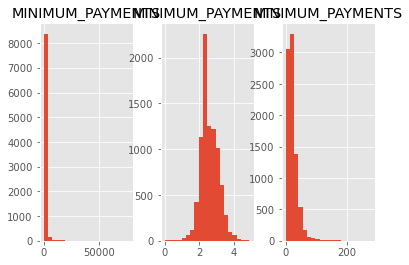

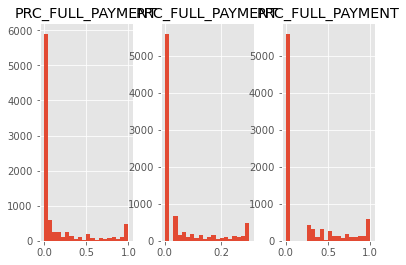

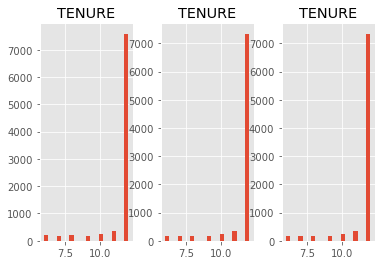

In [41]:
for i in df.columns:
    print("Skewness original: ",df[i].skew(), "Skewness Log10: ",Z[i].skew(), "Skewness SR: ",Y[i].skew())
    fig, axes = plt.subplots(1, 3)
    df.hist(i, bins=20, ax=axes[0])
    Z.hist(i, bins=20, ax=axes[1])
    Y.hist(i, bins=20, ax=axes[2])

#### APPLY TRANFORMATION

In [42]:
#Square Root

X[left_skew] = np.sqrt(Y[left_skew])

In [43]:
#Log 10

X[right_skew]=np.log10(X[right_skew]+1)

BALANCE Skewness original:  2.393386042571806 New Skewness:  -0.7760035358816254
BALANCE_FREQUENCY Skewness original:  -2.0232655185149078 New Skewness:  -2.5238704944190564
PURCHASES Skewness original:  8.144269064554651 New Skewness:  -0.7776879605982571
ONEOFF_PURCHASES Skewness original:  10.045082884700278 New Skewness:  0.16841964410507437
INSTALLMENTS_PURCHASES Skewness original:  7.299119908745641 New Skewness:  -0.04215742921362819
CASH_ADVANCE Skewness original:  5.1666090740747235 New Skewness:  0.24816946406309018
PURCHASES_FREQUENCY Skewness original:  0.0601642358580359 New Skewness:  0.03304121629361682
ONEOFF_PURCHASES_FREQUENCY Skewness original:  1.5356127835248519 New Skewness:  1.2607222558717441
PURCHASES_INSTALLMENTS_FREQUENCY Skewness original:  0.5092011649999882 New Skewness:  0.48775295432449595
CASH_ADVANCE_FREQUENCY Skewness original:  1.828686266477852 New Skewness:  1.425891693966091
CASH_ADVANCE_TRX Skewness original:  5.721298203192298 New Skewness:  0.9

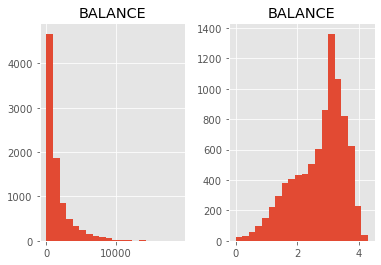

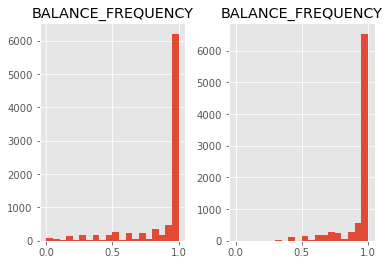

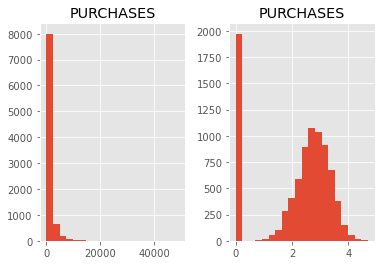

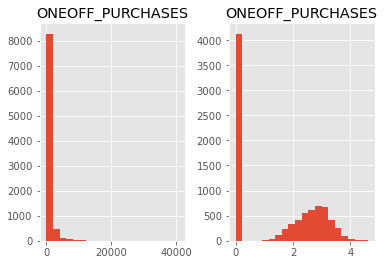

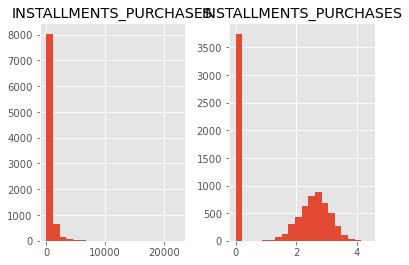

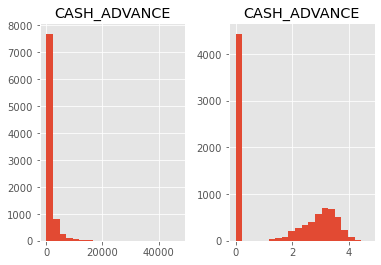

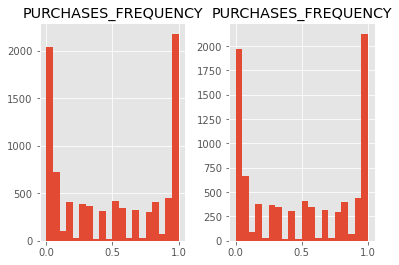

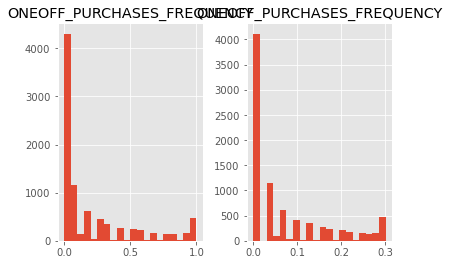

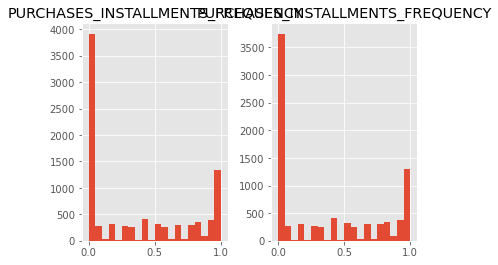

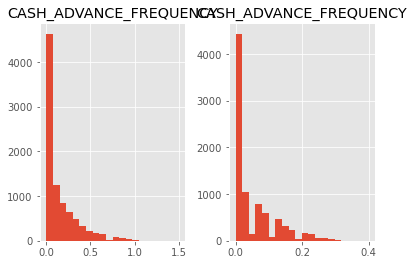

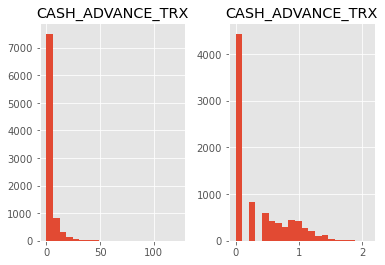

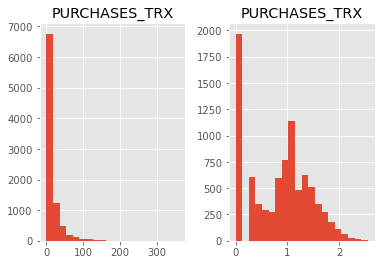

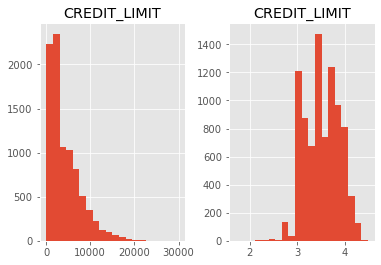

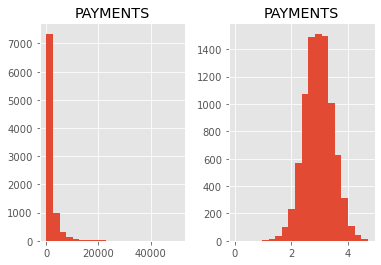

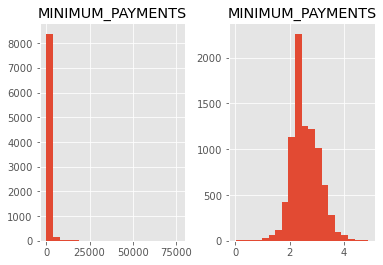

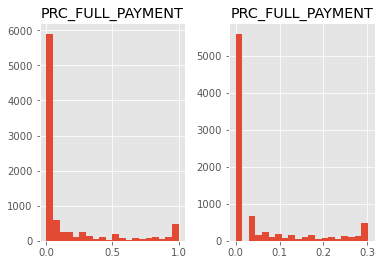

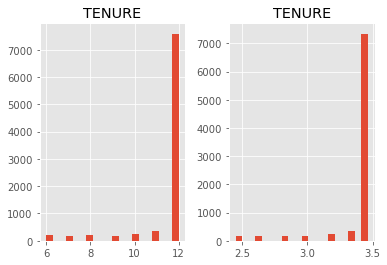

In [44]:
for i in df.columns:
    print(i,"Skewness original: ",df[i].skew(), "New Skewness: ",X[i].skew())
    fig, axes = plt.subplots(1, 2)
    df.hist(i, bins=20, ax=axes[0])
    X.hist(i, bins=20, ax=axes[1])

##### Normalization

In [45]:
# Get a copy of the dataframe before normalization
X_beforeNorm = X.copy(deep=True)


# Normalize all columns
cols = list(X.columns) # save the name of the columns
X_array = X.values # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_array)
X = pd.DataFrame(X_scaled, columns=cols)

### Modeling

* Correlations

In [46]:
dataCorr = X.corr()
dataCorr = dataCorr.mask(np.tril(np.ones(dataCorr.shape)).astype(np.bool))

correlation_mat = dataCorr

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.75 ]

strong_pairs2 = sorted_pairs[abs(sorted_pairs) < -0.75 ]

print(strong_pairs, strong_pairs2)

PURCHASES_TRX                     PURCHASES_INSTALLMENTS_FREQUENCY    0.758621
                                  INSTALLMENTS_PURCHASES              0.783017
PURCHASES_FREQUENCY               PURCHASES                           0.785913
                                  INSTALLMENTS_PURCHASES              0.796420
ONEOFF_PURCHASES_FREQUENCY        ONEOFF_PURCHASES                    0.815893
FREQ                              PURCHASES_TRX                       0.816429
CASH_ADVANCE_FREQUENCY            CASH_ADVANCE                        0.816435
MINIMUM_PAYMENTS                  BALANCE                             0.816587
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_FREQUENCY                 0.862338
                                  INSTALLMENTS_PURCHASES              0.879631
PURCHASES_TRX                     PURCHASES                           0.891518
CASH_ADVANCE_TRX                  CASH_ADVANCE                        0.899377
PURCHASES_TRX                     PURCHASES_FREQUENC

###### PCA Funciona Bem com variáveis correlacionadas

In [47]:
#dropped = ['BALANCE_FREQUENCY', 'PURCHASES_TRX','ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY', 'Fee_Applied?', 
           #'PURCHASES_FREQUENCY', 'BALANCE', 'CASH_ADVANCE', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX']

In [48]:
dropped = ['Fee_Applied?']

In [49]:
X.drop(dropped, axis = 1, inplace = True)

#### WITH PCA

#### Analyze Principal Components

(8636, 2)


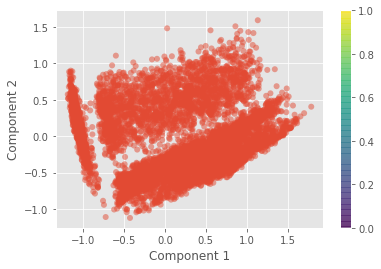

In [50]:
# Let'start to visualizar with only two components
pca2 = PCA(n_components = 2)
pca2.fit(X)
X_pca2 = pca2.transform(X) # Apply the dimension reduction to the dataset
print(X_pca2.shape)

# Plot a scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], edgecolor='none', alpha=0.5, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

In [51]:
# Fit the PCA algorithm to data 
pca = PCA().fit(X)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(X.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF

,Component,Variance explained,Cumulative variance explained
0,1,0.463007,0.463007
1,2,0.161881,0.624887
2,3,0.148847,0.773734
3,4,0.067991,0.841725
4,5,0.038378,0.880103
5,6,0.025326,0.905429
6,7,0.020983,0.926411
7,8,0.016367,0.942779
8,9,0.010954,0.953733
9,10,0.010801,0.964534


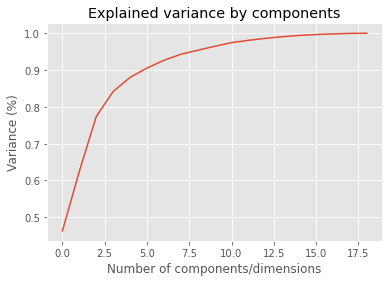

In [52]:
# Plot the cumulative explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance (%)')
plt.title('Explained variance by components')
plt.show()

### Modeling - K-Means

In [53]:
# Apply the dimension reduction to the dataset (for 8 components)
pca_reduced = PCA(n_components = 5)
pca_reduced.fit(X)
X_pca_reduced = pca_reduced.transform(X) 
print(X_pca_reduced.shape)

(8636, 5)


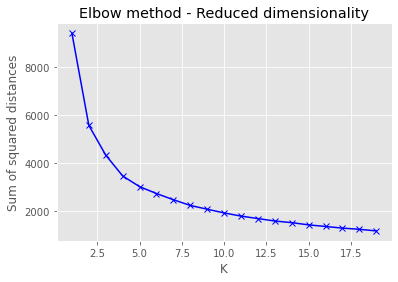

In [54]:
# Select K based on the sum of squared distances
ssd = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k, random_state=123)
    km = km.fit(X_pca_reduced)
    ssd.append(km.inertia_)
    
# Plot results
plt.plot(K, ssd, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method - Reduced dimensionality')
plt.show()

In [55]:
# Apply the K-Means for K=5
K=3
kmeans = KMeans(n_clusters=K, random_state=123)
kmeans.fit(X_pca_reduced)
y_kmeans = kmeans.predict(X_pca_reduced)

In [56]:
# Count observations per cluster
X_beforeNorm.groupby(y_kmeans).size()

0    2781
1    3700
2    2155
dtype: int64

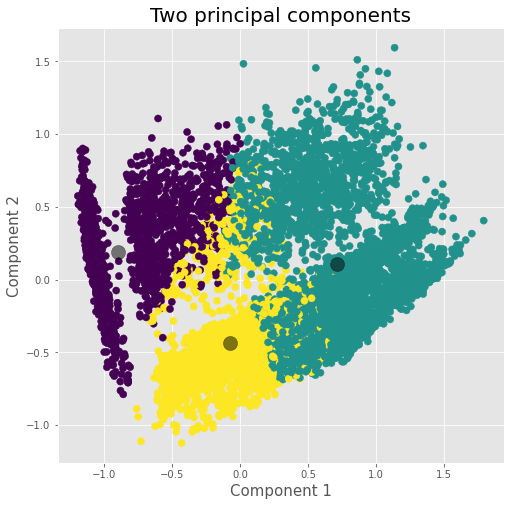

In [57]:
# Plot results two principal components
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('Two principal components', fontsize = 20)
ax.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [58]:
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca.components_,columns=X.columns)
wheightsDF

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,FREQ,MON
0,-0.047859,0.024852,0.311929,0.196299,0.347373,-0.254308,0.505401,0.222621,0.447691,-0.106975,-0.141823,0.294135,0.024586,0.026876,-0.016734,0.157344,0.030238,0.158014,0.013487
1,0.313594,0.132349,0.012066,0.114646,0.088797,0.556903,0.111659,0.138182,0.136846,0.277085,0.359229,0.085268,0.093302,0.117897,0.142325,-0.242895,0.002844,0.210248,0.378649
2,0.091483,0.012289,0.174398,0.569395,-0.262667,-0.050447,-0.071258,0.542020,-0.418947,-0.014751,-0.023192,0.074016,0.066734,0.051508,0.018280,-0.093507,0.041509,0.042792,-0.254880
3,-0.178093,-0.074255,-0.046713,0.011920,-0.061185,0.213481,-0.016163,0.156549,-0.128919,0.119452,0.145102,-0.021462,0.057661,0.087131,-0.091181,0.876436,-0.121815,0.063621,0.166424
4,-0.122160,-0.058613,0.020572,0.022372,-0.083231,0.067696,0.175485,0.059773,0.032134,0.079982,0.039542,-0.011784,-0.172037,-0.172762,-0.111475,-0.162386,-0.905126,-0.043172,-0.079693
5,0.154484,0.344697,-0.426296,-0.379202,-0.402353,-0.042969,0.407829,0.349404,0.091506,-0.019676,-0.027713,-0.035435,-0.080519,-0.055011,0.080340,0.054048,0.094301,0.067224,-0.191242
6,-0.566948,-0.366708,-0.000343,-0.012239,-0.144924,0.255134,0.202391,0.071964,0.078987,0.161124,0.231354,0.056424,-0.193446,-0.154375,-0.268205,-0.198419,0.349814,0.042601,-0.161431
7,-0.159295,-0.244218,-0.374209,-0.149088,0.271212,-0.079049,-0.154410,0.512179,-0.076231,-0.205417,-0.222458,-0.041620,0.122423,0.022910,-0.153055,-0.196731,-0.047433,0.044756,0.453462
8,0.003036,-0.268238,0.109107,-0.378356,0.035297,-0.276863,0.085200,0.004557,-0.199044,0.306872,0.209875,0.116314,0.590606,0.137683,0.084132,-0.078758,-0.097360,0.247842,-0.210899
9,-0.008689,0.247462,0.216060,-0.295262,0.375008,-0.149823,0.009704,0.120872,-0.487110,0.174139,0.155047,0.145439,-0.518526,-0.162826,0.034995,0.001030,0.064335,0.090852,0.072464


In [59]:
# Study the weights of components
comp = abs(wheightsDF.iloc[5])  ## id 14 is component 14
comp = comp.sort_values(ascending=False)
comp

PURCHASES                           0.426296
PURCHASES_FREQUENCY                 0.407829
INSTALLMENTS_PURCHASES              0.402353
ONEOFF_PURCHASES                    0.379202
ONEOFF_PURCHASES_FREQUENCY          0.349404
BALANCE_FREQUENCY                   0.344697
MON                                 0.191242
BALANCE                             0.154484
TENURE                              0.094301
PURCHASES_INSTALLMENTS_FREQUENCY    0.091506
CREDIT_LIMIT                        0.080519
MINIMUM_PAYMENTS                    0.080340
FREQ                                0.067224
PAYMENTS                            0.055011
PRC_FULL_PAYMENT                    0.054048
CASH_ADVANCE                        0.042969
PURCHASES_TRX                       0.035435
CASH_ADVANCE_TRX                    0.027713
CASH_ADVANCE_FREQUENCY              0.019676
Name: 5, dtype: float64

In [60]:
# Check the mean values of each cluster for top 30 relevant featureslen()
top_features = comp[:30].index
clustersMeanDF = pd.DataFrame(XPrelog[top_features].groupby(y_kmeans).mean(),columns=top_features)
clustersMeanDF.transpose()

,0,1,2
PURCHASES,118.047896,1873.246789,740.762237
PURCHASES_FREQUENCY,0.064298,0.884304,0.386412
INSTALLMENTS_PURCHASES,18.538026,921.684168,80.101661
ONEOFF_PURCHASES,99.553621,952.108724,660.913188
ONEOFF_PURCHASES_FREQUENCY,0.042910,0.288420,0.274589
BALANCE_FREQUENCY,0.914059,0.946757,0.781682
MON,2197.786304,1557.991014,159.394016
BALANCE,2363.557033,1501.609891,788.477711
TENURE,11.353830,11.596486,11.660789
PURCHASES_INSTALLMENTS_FREQUENCY,0.019649,0.780791,0.112094


#### WITHOUT PCA

In [61]:
#Variables that are correlated

print(strong_pairs, strong_pairs2)

PURCHASES_TRX                     PURCHASES_INSTALLMENTS_FREQUENCY    0.758621
                                  INSTALLMENTS_PURCHASES              0.783017
PURCHASES_FREQUENCY               PURCHASES                           0.785913
                                  INSTALLMENTS_PURCHASES              0.796420
ONEOFF_PURCHASES_FREQUENCY        ONEOFF_PURCHASES                    0.815893
FREQ                              PURCHASES_TRX                       0.816429
CASH_ADVANCE_FREQUENCY            CASH_ADVANCE                        0.816435
MINIMUM_PAYMENTS                  BALANCE                             0.816587
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_FREQUENCY                 0.862338
                                  INSTALLMENTS_PURCHASES              0.879631
PURCHASES_TRX                     PURCHASES                           0.891518
CASH_ADVANCE_TRX                  CASH_ADVANCE                        0.899377
PURCHASES_TRX                     PURCHASES_FREQUENC

##### Drop Columns not to be used

In [62]:
dropped = ['BALANCE_FREQUENCY','PURCHASES_TRX','ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY', 
           'PURCHASES_FREQUENCY', 'BALANCE', 'CASH_ADVANCE', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX']

In [63]:
X.drop(dropped, axis = 1, inplace = True)

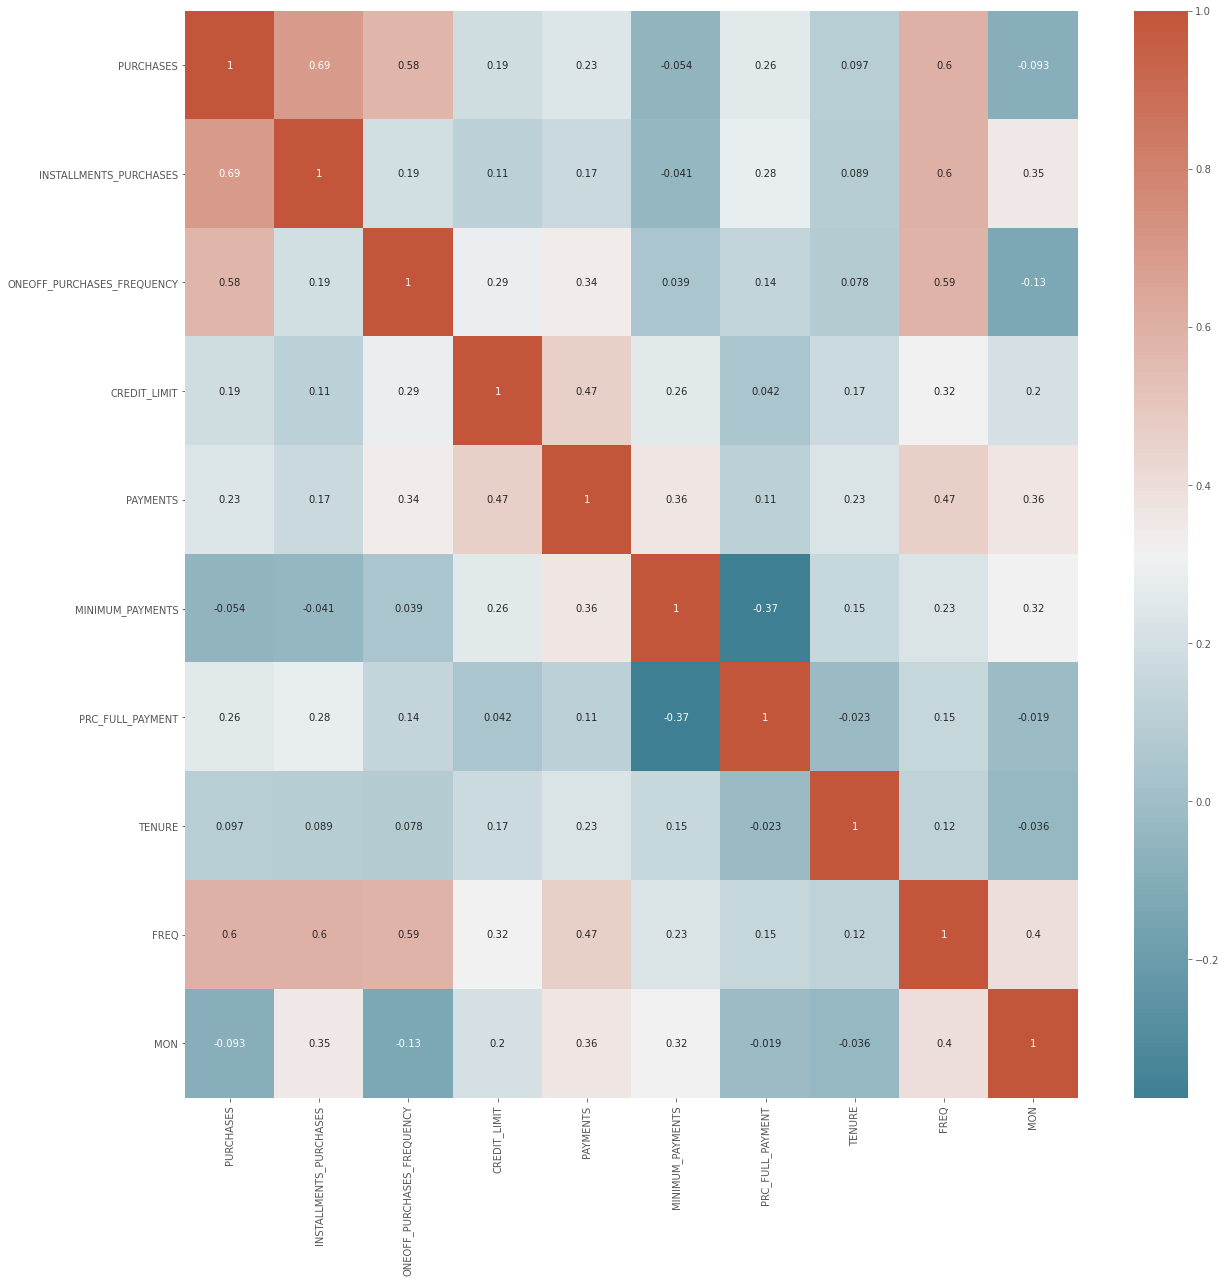

In [64]:
# Ver se escapou alguma

cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize = (20,20))
sns.heatmap(X.corr(), annot = True, cmap = cmap)
plt.show()

In [65]:
df_clustered = XPrelog.copy()

df_scaled = X

from sklearn.cluster import KMeans

nr_clusters = 25
sse = []

for k in range(1, nr_clusters + 1):
    kmeans_model = KMeans(n_clusters = k, random_state = 123)
    kmeans_model.fit(df_scaled)
    sse.append(kmeans_model.inertia_)

In [66]:
df_sse = pd.DataFrame({'nr_clusters': range(1, nr_clusters + 1), 'sse': sse})
df_sse.head()

,nr_clusters,sse
0,1,4564.647556
1,2,3295.881198
2,3,2664.778593
3,4,2220.798384
4,5,1843.605783


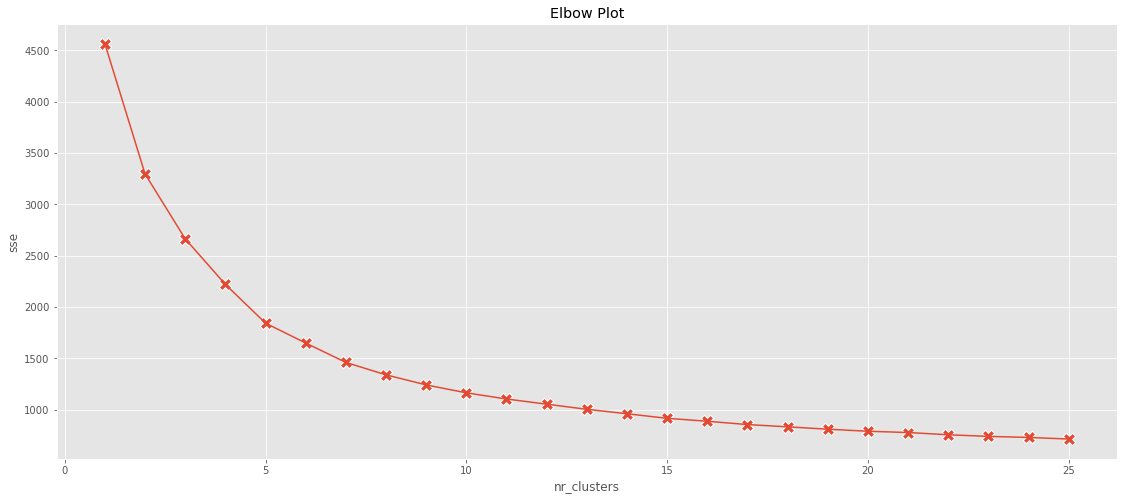

In [67]:
plt.figure(figsize = (19, 8))
sns.lineplot(data = df_sse, x = 'nr_clusters', y = 'sse')
sns.scatterplot(data = df_sse, x = 'nr_clusters', y = 'sse', marker = 'X', s = 150)
plt.title('Elbow Plot')
plt.show()

In [68]:
#Silhouette Score

#The silhouette score of 1 means that the clusters are very dense and nicely separated.

range_n_clusters = list (range(2,10))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state = 123)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.27615631290457604)
For n_clusters = 3, silhouette score is 0.2818768156182735)
For n_clusters = 4, silhouette score is 0.31948547328107807)
For n_clusters = 5, silhouette score is 0.3364861325508497)
For n_clusters = 6, silhouette score is 0.3434525246930131)
For n_clusters = 7, silhouette score is 0.35575757906693234)
For n_clusters = 8, silhouette score is 0.3504607199349105)
For n_clusters = 9, silhouette score is 0.3561239990270679)


In [69]:
# Cluster

nr_clusters = 4

kmeans_model = KMeans(n_clusters = nr_clusters, random_state = 123)
kmeans_model.fit(df_scaled)
y_kmeans = kmeans_model.predict(df_scaled)

In [70]:
# Count observations per cluster
X_beforeNorm.groupby(y_kmeans).size()

0    3382
1    1234
2    2480
3    1540
dtype: int64

In [71]:
print(kmeans_model.inertia_)

2220.7983837926413


In [72]:
df_clustered['cluster_kmeans'] = kmeans_model.labels_+1

In [73]:
centroids_kmeans = df_clustered.groupby('cluster_kmeans').mean()
centroids_kmeans.transpose()

cluster_kmeans,1,2,3,4
BALANCE,1077.404189,929.767299,2259.029590,2230.305828
BALANCE_FREQUENCY,0.877482,0.816949,0.906592,0.977542
PURCHASES,728.052312,904.688655,48.392641,3348.684721
ONEOFF_PURCHASES,154.781511,904.351110,48.026972,2250.247786
INSTALLMENTS_PURCHASES,573.917188,0.644579,0.414730,1098.436935
CASH_ADVANCE,528.472303,88.296835,2080.586755,993.242233
PURCHASES_FREQUENCY,0.701323,0.367242,0.028711,0.900780
ONEOFF_PURCHASES_FREQUENCY,0.061330,0.364873,0.025466,0.686623
PURCHASES_INSTALLMENTS_FREQUENCY,0.639680,0.003591,0.003154,0.655507
CASH_ADVANCE_FREQUENCY,0.074258,0.030704,0.283460,0.127494


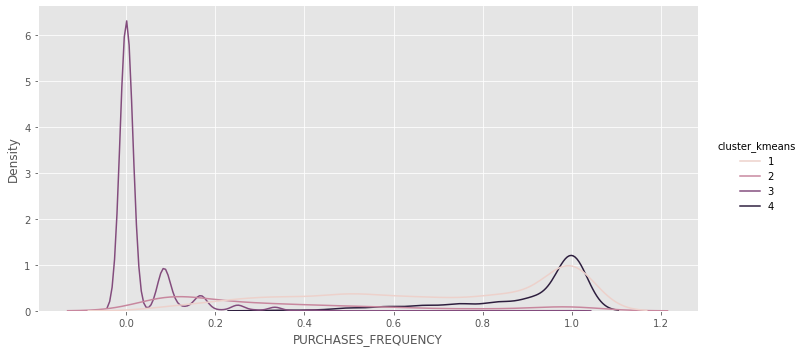

In [74]:
sns.displot(data=df_clustered, x="PURCHASES_FREQUENCY", hue="cluster_kmeans",aspect = 2, kind="kde")

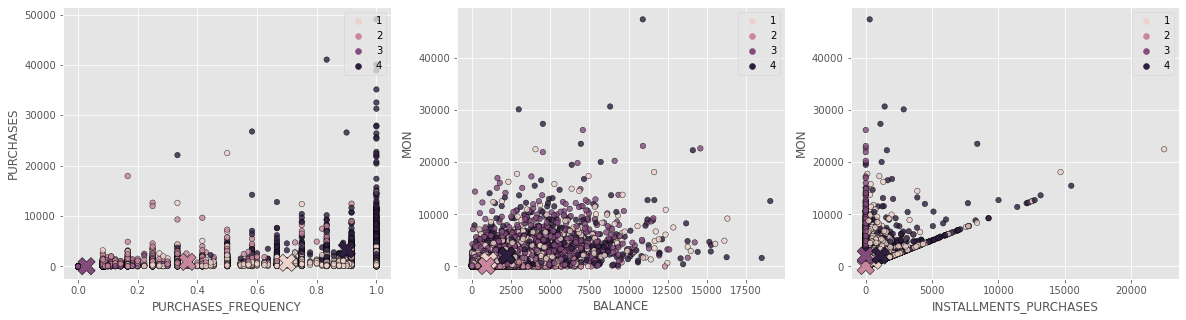

In [75]:
def plot_scatter_cluster(data, centroids, x, y, hue, ax):
    sns.scatterplot(data = data, x = x, y = y, hue = hue,s = 30, linewidth = .5,  edgecolor = 'black', alpha = .8,ax = ax)
    sns.scatterplot(data = centroids, x = x, y = y, hue = hue,s = 300, marker = 'X', linewidth = .5,  edgecolor = 'black',legend = False, ax = ax)
    ax.legend(loc = 'upper right')
    

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
plot_scatter_cluster(data = df_clustered, centroids = centroids_kmeans, x = 'PURCHASES_FREQUENCY', y = 'PURCHASES', hue = 'cluster_kmeans', ax = ax[0])
plot_scatter_cluster(data = df_clustered, centroids = centroids_kmeans, x = 'BALANCE', y = 'MON', hue = 'cluster_kmeans', ax = ax[1])
plot_scatter_cluster(data = df_clustered, centroids = centroids_kmeans, x = 'INSTALLMENTS_PURCHASES', y = 'MON', hue = 'cluster_kmeans', ax = ax[2])
plt.show()